# Root Locus Plots

From feedback equation, the transfer function from $r$ to $y$ is just $T$, so we have:
$$
\begin{align*}
Y(s) &= T(s)R(s) \\
&= \frac{P(s)K}{1 + P(s)K}R(s)
\end{align*}
$$

Express $P(s) = \frac{B(s)}{A(s)}$:
$$
\begin{align*}
Y(s) &= \frac{\frac{B(s)}{A(s)}K}{1 + \frac{B(s)}{A(s)}K}R(s) \\
&= \frac{KB(s)}{A(s) +B(s)K}R(s)
\end{align*}
$$
This is the transfer function of the closed-loop system. Key observations:
- Poles of the system depend on $K$
- When $K=0$, the poles of the closed-loop system are the same as those of the open-loop system (i.e. $P(s)$). Why?
- When $K=\infty$, the poles of the closed-loop system are equal to the zeros of the open-loop system. Why?

# The Plot
- Plot an $+$ at the open-loop poles (are starting points of the lines). 
- Let $K = 0 \to \infty$, and plot the progression of the poles of the closed-loop system in the s-plane.
- Plot a $o$ at the open-loop zeros (will be terminating points of the lines).

Observations:
- Each line on the plot starts at an open-loop pole.
- If there are open-loop zeros, then some of the lines will end at a zero.
- If there are more poles than zeros, then there will be asymptotes.


In [2]:
import numpy as np
import control as ct
import enel441_utilities as eu
import matplotlib.pyplot as plt

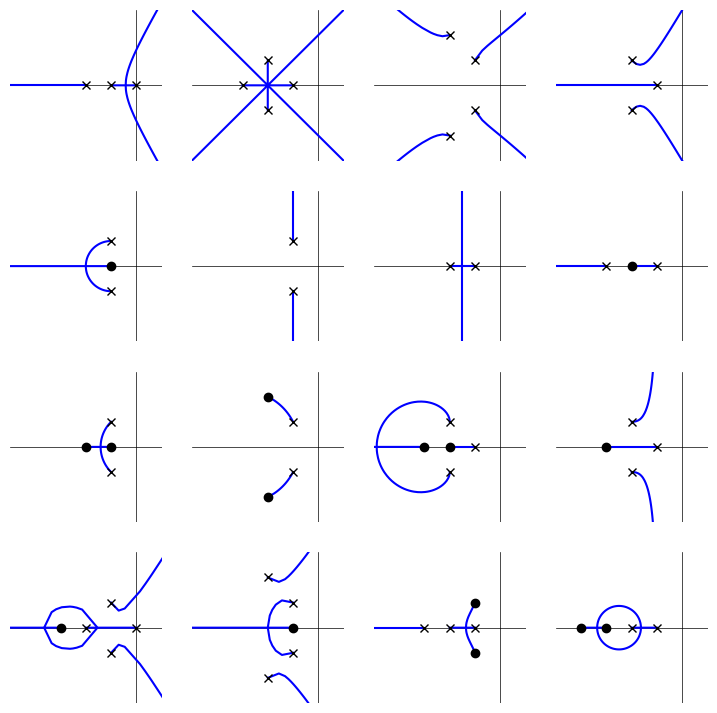

In [2]:
poles = [[np.array([]) for i in range(4)] for i in range(4)]
zeros = [[np.array([]) for i in range(4)] for i in range(4)]

poles[0][0] = np.array([-2, -1, 0])
#zeros[0][0] = []

poles[0][1] = np.array([-2-1j, -2+1j, -3, -1])
#zeros[0][1] = []

poles[0][2] = np.array([-1-1j, -1+1j, -2-2j, -2+2j])
#zeros[0][2] = []

poles[0][3] = np.array([-2-1j, -2+1j, -1])
#zeros[0][3] = []

poles[1][0] = np.array([-1-1j, -1+1j])
zeros[1][0] = np.array([-1])

poles[1][1] = np.array([-1-1j, -1+1j])
#zeros[1][1] = []

poles[1][2] = np.array([-1, -2])
#zeros[1][2] = []

poles[1][3] = np.array([-1, -3])
zeros[1][3] = np.array([-2])

poles[2][0] = np.array([-1-1j, -1+1j])
zeros[2][0] = np.array([-1, -2])

poles[2][1] = np.array([-1-1j, -1+1j])
zeros[2][1] = np.array([-2-2j, -2+2j])

poles[2][2] = np.array([-2-1j, -2+1j, -1])
zeros[2][2] = np.array([-2, -3])

poles[2][3] = np.array([-2-1j, -2+1j, -1])
zeros[2][3] = np.array([-3])

poles[3][0] = np.array([-1-1j, -1+1j, 0, -2])
zeros[3][0] = np.array([-3])

poles[3][1] = np.array([-1-1j, -1+1j, -2+2j, -2-2j])
zeros[3][1] = np.array([-1])

poles[3][2] = np.array([-1, -2, -3])
zeros[3][2] = np.array([-1-1j, -1+1j])

poles[3][3] = np.array([-1, -2])
zeros[3][3] = np.array([-3, -4])

fig,ax = plt.subplots(4,4, figsize=(9,9))
for ii in range(4):
    for jj in range(4):
        den = eu.roots_to_polynomial(poles[ii][jj])
        num = eu.roots_to_polynomial(zeros[ii][jj])
        P = ct.tf(num,den)
        cl_poles, K = ct.root_locus(P, plot=False)

        ax[ii,jj].plot([-5,1],[0,0],'k',linewidth=0.5)
        ax[ii,jj].plot([0,0],[-3,3],'k',linewidth=0.5)
        ax[ii,jj].plot(np.real(cl_poles), np.imag(cl_poles), 'b')
        ax[ii,jj].plot(np.real(poles[ii][jj]),np.imag(poles[ii][jj]), 'kx' )
        ax[ii,jj].plot(np.real(zeros[ii][jj]),np.imag(zeros[ii][jj]), 'ko' )
        ax[ii,jj].set_xlim(-5,1)
        ax[ii,jj].set_ylim(-3,3)
        ax[ii,jj].axis('off')
        



# Some interesting observations (for the future)
- Note the effect of placing a zero (in the left-half plane)! A system that could be unstable (for large values of $K$) can be guaranteed to be stable. For example, see the progression from (1,4) -> (3,4) -> (3,3) as more zeros are added to the system. 

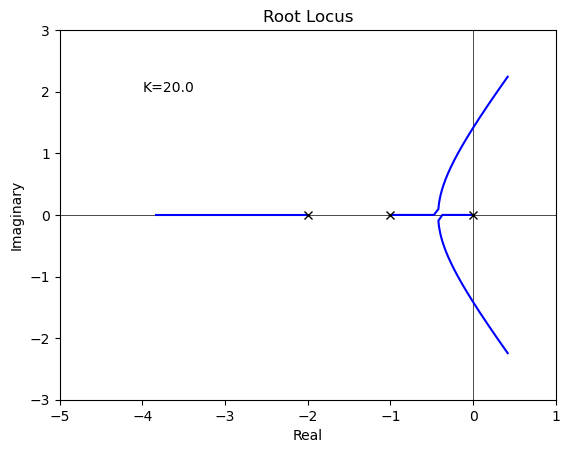

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import control as ct
import enel441_utilities as eu

poles = np.array([-2, -1, 0])
zeros = []

den = eu.roots_to_polynomial(poles)
num = eu.roots_to_polynomial(zeros)

P = ct.tf(num,den)
N = 1000
K_vec = np.linspace(0,20,N)

# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Root Locus', artist='Matplotlib',
                comment='visualize closed loop poles moving')
writer = FFMpegWriter(fps=15, metadata=metadata)

# Initialize the movie
fig, ax = plt.subplots(1)
with writer.saving(fig, "root_locus_video.mp4", 100):
    for ii in range(1,N):

        cl_poles, K = ct.root_locus(P, plot=False, kvect=K_vec[0:ii])
        ax.clear()
        ax.plot([-5,1],[0,0],'k',linewidth=0.5)
        ax.plot([0,0],[-3,3],'k',linewidth=0.5)
        ax.plot(np.real(cl_poles), np.imag(cl_poles), 'b')
        ax.plot(np.real(poles),np.imag(poles), 'kx' )
        ax.plot(np.real(zeros),np.imag(zeros), 'ko' )
        ax.set_xlim(-5,1)
        ax.set_ylim(-3,3)
        ax.set_title('Root Locus')
        ax.set_xlabel('Real')
        ax.set_ylabel('Imaginary')
        ann_str = 'K='+str(K_vec[ii])
        ax.annotate(ann_str,(-4,2))
        writer.grab_frame()
       

In [4]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="root_locus_video.mp4" type="video/mp4">
</video></div>""")

# Why is $K$ assumed to be positive?

Consider question 18 in the practice problems. We have a plant $P(s) = \frac{s+4}{s^2+2s+2}$. We want to design a proportional controller that results in a closed loop system with percent overshoot less than 2\% and a peak time that is as fast as possible. 

It is possible to find two controllers that satisfy the requirements: $K=5.868$ and $K=-0.147$. What is the problem with selecting a controller with a negative value?

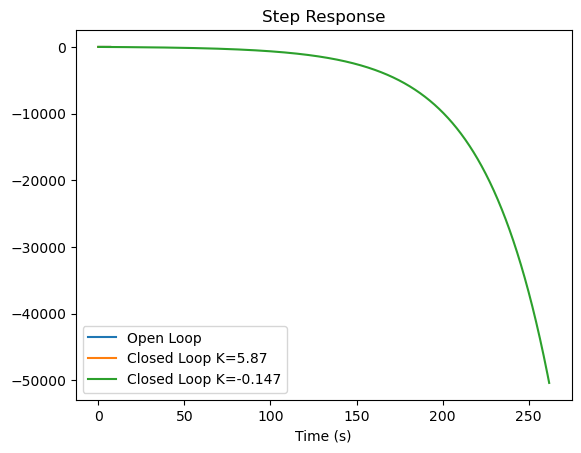

In [8]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

P = ct.tf([1, 4], [1, 2, 2])

K1 = 5.87
K1_tf = ct.tf(K1,1)
T1 = P*K1_tf/(1+P*K1_tf)

K2 = -0.51
K2_tf = ct.tf(K2,1)
T2 = P*K2_tf/(1+P*K2_tf)

t_ol,y_step_ol = ct.step_response(P)
t_cl1,y1_step_cl = ct.step_response(T1)
t_cl2,y2_step_cl = ct.step_response(T2)

fig,ax = plt.subplots(1)
ax.plot(t_ol,y_step_ol, label='Open Loop')
ax.plot(t_cl1,y1_step_cl, label='Closed Loop K=5.87')
ax.plot(t_cl2,y2_step_cl, label='Closed Loop K=-0.147')
ax.set_title('Step Response')
ax.set_xlabel('Time (s)')
ax.legend()


Because of the negative controller, the step response moves in the opposite direction as the step input (a positive step input results in a negative output). 



# We can show that in general $K$ should be positive

Before we start, need to prove a result.

Consider a transfer function 
$$G(s) = \frac{B(s)}{A(s)} = \frac{b_0 + b_1s + b_2s^2 + \cdots + b_{n_b}s^{n_b}}{a_0 + a_1s + a_2s^2 + \cdots + a_{n_a-1}s^{n_a-1} + s^{n_a}}$$
If $G(s)$ is stable, then $a_0 >0$.

Proof:
Express $A$ in terms of its roots (these are the poles of $G(s)$):
$$
\begin{align*}
A(s) = (s+p_1)(s+p_2) \cdots (s+p_{n_a})
\end{align*}
$$

From this expression, it is possible to obtain an expression for $a_0$ in terms of the poles:
$$
\begin{align*}
a_0 = p_1p_2 \cdots p_{n_a}
\end{align*}
$$
Because $G(s)$ is assumed to be positive, all $p_{n_a}$ have positive real part. In addition, all complex poles appear in conjugate pairs. This implies that $a_0$ is positive. 
End of Proof

# Main Result

We want to understand why only considering $K>0$ makes sense. In the following text we will show that under mild assumptions it is reasonable to only consider $K>0$. 

We will make several assumptions:
1. The open-loop system is stable,
2. The closed-loop system is stable,
3. The open-loop system is such that when a positive step input is applied, the steady state output is also positive. 
4. The closed-loop system is such that when a positive step input is applied, the steady state output is also positive. 

For many systems this is reasonable. 

We will use the following notation:
- $r(t)$ is a unit step when we do these calculations.
- $P(s) = \frac{B(s)}{A(s)}$, where 
    - $B(s) = b_0 + b_1s + b_2s^2 + \cdots + b_{n_b}s^{n_b}$,
    - $A(s) = a_0 + a_1s + a_2s^2 + \cdots + a_{n_a-1}s^{n_a-1} + s^{n_a}$,
    - $n_a \ge n_b$,
    - $a_{n_a} \ne 0$, 
    - $b_{n_b} \ne 0$.

Let's look at the steady state error of the closed-loop system when a step input is applied to the reference input. 

# Step 1.

$$
\begin{align*}
Y(s) &= \frac{P(s)K}{1 + P(s)K} R(s) \\
&= \frac{P(s)K}{1 + P(s)K}\frac{1}{s} \\
&= \frac{P(s)K}{1 + \frac{B(s)}{A(s)}K} \frac{1}{s} \\
&= \frac{B(s)K}{A(s)+ B(s)K}\frac{1}{s} 
\end{align*}
$$

Now find $y(\infty)$:
$$
\begin{align*}
y(\infty) &= \lim_{s \to 0} s Y(s) \\
&= \lim_{s \to 0} s \frac{B(s)K}{A(s)+ B(s)K}\frac{1}{s}  \\
& = \lim_{s \to 0} \frac{B(s)K}{A(s)+ B(s)K} \\
&= \lim_{s \to 0} \frac{K(b_0 + b_1s + b_2s^2 + \cdots + b_{n_b}s^{n_b})}{a_0 + a_1s + a_2s^2 + \cdots + a_{n_a-1}s^{n_a-1} + s^{n_a} + K(b_0 + b_1s + b_2s^2 + \cdots + b_{n_b}s^{n_b})} \\
&= \frac{Kb_0}{a_0 + Kb_0}
\end{align*}
$$

Because the open loop system is assumed to be stable, it follows that $a_0>0$. 

Next, we will use the assumptions to show that $b_0$ also is positive. Consider the steady state value of the open-loop response to a unit step input:
$$
\begin{align*}
Y_{ol}(s) &= P(s)U(s) \\
&= \frac{B(s)}{A(s)}\frac{1}{s} \\
&= \frac{b_0 + b_1s + b_2s^2 + \cdots + b_{n_b}s^{n_b}}{a_0 + a_1s + a_2s^2 + \cdots + a_{n_a-1}s^{n_a-1} + s^{n_a}}\frac{1}{s}
\end{align*}
$$
Now find $y_{ol}(\infty)$:
$$
\begin{align*}
y_{ol}(\infty) &= \lim_{s \to 0} s Y(s) \\
&= \lim_{s \to 0} s \frac{b_0 + b_1s + b_2s^2 + \cdots + b_{n_b}s^{n_b}}{a_0 + a_1s + a_2s^2 + \cdots + a_{n_a-1}s^{n_a-1} + s^{n_a}}\frac{1}{s} \\
&= \frac{b_0}{a_0}
\end{align*}
$$
We already know that $a_0 >0$. By the second assumption, $y_{ol}(\infty)$ is positive, thus it follows that $b_0$ must be positive. 

# Step 2.

The closed-loop steady state value to a unit step is equal to 
$$
\begin{align*}
y(\infty )= \frac{Kb_0}{a_0 + Kb_0},
\end{align*}
$$
where $a_0$ and $b_0$ are both positive. By the fourth assumption, $y(\infty)$ is positive. In order to determine the range of $K$ for which $y_{\infty}$ is positive, it is helpful to consider the positivity/negativity of the numerator and denominator separately. 
- Case 1: $K<-\frac{a_0}{b_0}$. The numerator is negative, and the denominator is negative, thus $y_{\infty}$ is positive. 
- Case 2: $-\frac{a_0}{b_0} < K < 0$. The numerator is negative, and the denominator is positive, thus $y_{\infty}$ is negative. 
- Case 3: $K > 0$. The numerator is positive, and the denominator is positive, thus $y_{\infty}$ is positive. 

Thus, the values of $K$ of Cases 1 and 3, lead to systems for which the assumptions hold. 

# Step 3.
In this step we will use the stability assumptions to rule out the range of $K<-\frac{a_0}{b_0}$. 

# Examples

# Mentimeter Question 1

Consider a system with Root Locus plot shown below. Is it possible to design a proportional controller $K$ such that the closed loop system has a settling time of less than $4$ seconds? Note that the open loop poles are at $-2\pm j2$ and $-3 \pm j3$.

![rootlocus](root_locus_ex1.png "Root Locus")

# Mentimeter Question 2

Consider a system with Root Locus plot shown below. Is it possible to design a proportional controller $K$ such that the closed loop system has a percent overshoot less than 4\%? Note that the open loop poles are at $-1\pm j1$ and $-3$, and the open loop zero is at $-4$.

![rootlocus](root_locus_ex2.png "Root Locus")

# Manually Finding exact value of $K$.

Question: for a given plant, determine values (or a range of values) of $K$ such that the closed loop system meets the design requirements. 

The general procedure for solving these questions is:
1. Determine the closed-loop transfer function.
2. Determine the poles of the closed-loop transfer function (the roots of the denominator).
3. Determine if it is possible to satisfy design requirements and if so, where you want to place the poles in the s-plane based on the given requirements
4. Determine the range of $K$ that will result in complex poles and real poles
5. Assume complex poles. Plug in expression for $\alpha$ and $\beta$ from step 3 into the expressions from step 5. Solve for $K$.
6. Check if $K$ falls within the range required for complex poles from step 4. If it does, then everything works out and you are done. If not, continue to next step.
7. Assume real poles. Determine a new expression for $\alpha$. In this case $\beta$ will be zero. 
8. Plug in expression for $\alpha$ from step 8 into the expressions from step 5. Solve for $K$.
9. Check if $K$ falls within the range required for real poles from step 4. This time it should, and you are done.

# Example 1

Consider a plant $P(s) = \frac{1}{(s+0.5)(s+6)}$. Design a proportional controller with:
- a settling time less than 4s,
- peak time as fast as possible,
- percent overshoot less than $5$\%.

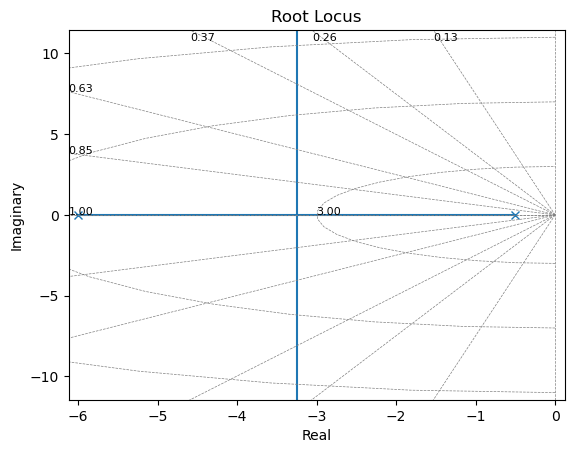

In [4]:
P = ct.tf([1],[1, 6.5, 3])
out = ct.root_locus(P)

In [1]:
import numpy as np

-np.log(0.05)/np.pi

0.9535711990320793